# Building blocks of a computer program

## Reading and writing files (in programs)

The first step towards gaining access to your data is being able to read it into memory. Writing subsets of processed results out to disk is often preferrable to performing an entire analysis in one shot.

### Conceptually

When we list (`ls`) and `find` files in the file system, we are referring to the _names of the data containers_. For reading the contents of an _existing_ file, we must ask the OS to ___open the file for reading___. When instead we wish to write to file _with a specific name_, we must ask the OS to ___open the file for writing___ (possibly _creating the file_, if one did not already exist). We can also ___open the file for appending___.

Once we're done with I/O-operations on a file, ___we must remember to close it___.

### Programmatically

Each language has its own syntax for file I/O, but the basic idiom is:

1. open a file ('r', 'w', or 'a'), receive a _file pointer_ in the process
2. read from or write to the file pointer
3. close the file pointer, thus closing the file I/O-process

### In Python

The built-in function `open` opens a file, and returns a file pointer object to it. The pointer has methods for reading/writing, and a `close`-method for finishing up.

(_Matlab has a slightly different syntax, but the ideas are the same._)

In [ ]:
fp = open('dickens.txt', 'rt')  # note the 'rt': 'Read as Text'
payload = fp.read()  # assign entire contents to a variable
fp.close()  # close the file
print(payload)  # print the contents

## Control flow: conditionals and iteration  
  
See Chapters 5 and 7 in (Downey, 2015) and [this notebook](control_flow.ipynb).

## Functions  
  
"In the context of programming, a **function** is a named sequence of statements that performs a computation. When you define a function, you specify the name and the sequence of statements. Later, you can 'call' the function by name.   
  
A function call is like a detour in the flow of execution. Instead of going to the next statement, the flow jumps to the body of the function, runs the statements there, and then comes back to pick up where it left off.  
  
That sounds simple enough, until you remember that one function can call another. While in the middle of one function, the program might have to run the statements in another function. Then, while running that new function, the program might have to run yet another function!  
  
In summary, when you read a program, you don’t always want to read from top to bottom. Sometimes it makes more sense if you follow the flow of execution.” (Downey, 2015; Chapter 3)  
  
### Arguments  

Some functions just do their 'thing', but most take _input arguments_. These can either be in the form of _parameters_ that modify what the function actually does, and/or in the form of _data to operate on_. (This is merely a conceptual distinction: parameters are also a form of data, of course!).

### Why functions?  
  
But is there a deeper point/advantage in using functions instead of just writing out the code you want to have executed? One reason is that:

>Creating a new function gives you an opportunity to name a group of statements, which makes your program easier to read and debug. [and] Well-designed functions are often useful for many programs. Once you write [...] one, you can reuse it.

A third example relates to efficiency:

>Functions can make a program smaller by eliminating repetitive code. Later, if you make a change, you only have to make it in one place.” (Downey, 2015)  
  
### Defining functions

Before a function can be used in a programme, it must be _defined_. In the Python-language, this is achieved using the `def` keyword, arguments in parentheses and a colon (:)

```python
def a_new_function(param1, param2, meaningful_name=2):
    code...
    return(return_value)
```

In another common interpreted language, _Matlab_, the keyword to use is `function`, and the value of the variable `return_value` must be set in the code

```Matlab
function return_value = a_new_function(param1, param2, param3)
    code...
```

### Example: the book price from Tuesday

One solution was:
```python
cp=60
b=229
dc=0.4
sh=49
ad=3
print(cp*b*(1-dc) + sh + (cp-1)*ad)
```

Now if we want to know the price for N amount of books, we can turn it into a function that takes the number of books as a parameter.

In [ ]:
def book_price(N=60):
    """This function calculate the total price of books. 
    
    Parameters:
    ===========
    N : int
        Number of books
    
    Return:
    =======
    total_price : float
        the total price for N books
    """    
    cp=N  # number of books 
    b=229  # base price of one book 
    dc=0.4 # discount
    sh=49  # shipping for the first book
    ad=3  # shipping for additional books
    return( (cp*b*(1-dc) + sh + (cp-1)*ad) )



Now we can call the function with any amount of books

In [ ]:
print("The price for 60 books: ", book_price(60))  # first the number where we know the result, just to check it works
print("The price for 50 books: ", book_price(50))

We can make a loop that calls the functions to see the prize for a large amount of books

### Loops and memory
 

In [2]:
import sys
import numpy as np
no_memory_assignment_var = []
no_memory_assignment_mem = []
memory_assignment_var = np.empty(10)
memory_assignment_mem = np.empty(10)

# time the loops
%timeit for i in range(10): no_memory_assignment_var.append(i); no_memory_assignment_mem.append(sys.getsizeof(no_memory_assignment_var))
%timeit for i in range(10): memory_assignment_var[i] = i; memory_assignment_mem[i] =  sys.getsizeof(memory_assignment_var)



4.99 µs ± 31 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
5.16 µs ± 122 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


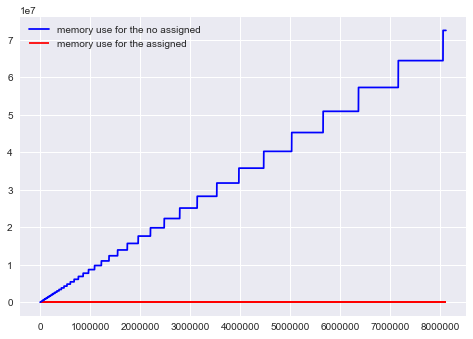

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use("seaborn")

plt.figure();
plt.plot(no_memory_assignment_mem, 'b', label="memory use for the no assigned");
plt.hlines(memory_assignment_mem, 0, len(no_memory_assignment_mem), 'r',
           label="memory use for the assigned");
plt.legend();


In [ ]:
import numpy as np

N = 250  # number of books 

books = np.empty(N)  # Make an empty array to reduce memory
for i in range(N):  # we know the number of iterations we want of the loop, hence a *for* loop
    #print(i)
    books[i] = book_price( i + 1 )  # why the "i + 1"?

Now we make a simple graph of the price of books

In [ ]:
%matplotlib inline  
import matplotlib.pyplot as plt  # import the python library 
plt.style.use("seaborn")  # specify the aesthetics properties of the plot 

plt.figure()  # make a new figure
plt.plot(books);  # plot the books
plt.ylabel("Price of the books in DKK");  # set the y-axiss text
plt.xlabel("Number of books");  # set the x-axiss text
plt.title("Price of books");  # set the title text

## Function or loop: When to use what?
It depends. The combination is very powerful and useful.


## Debugging  
  
Errors and mistakes inevitably find their way into code. The execution (or compilation) of a program stops at an error, after which it is your job to fix the code.
  
By ‘mistake’, we here refer to something less than an ‘error’, _i.e._, the program may run to completion, but the output will be 'off' in some more-or-less obvious fashion. 

For both errors and mistakes, sorting out where in the code the 'bug' is hiding, often requires _examining the contents_ of a variable: at which stage does the program behave differently from what we expect/intend?

Debugging is essentially the act of _stepping through_ each (relevant) line of code, until the culprit is found. Some coding software (_Integrated Development Environment_, IDE) allow you to set a **break point** at a specific line in the code. When the program is run, the interpreter simply _halts_ at the line, and waits for you to continue. Before doing so, you can 'inspect' the contents of variables to identify the problematic spot.

The most simple form of debugging, and by far the one used most in 'casual' programming, is **adding print-statements in the code**.

## Version Control Systems (VCS)

Developing programs and analysis pipelines is _iterative_, and sometimes you make mistakes. Using a VCS is the _only_ way to survive situations like:

* "The code worked yesterday, now it's broken; why?"
* "Please redo the analysis from 4 months back"
* Asger and Alma are working on the same project, even on the same file; how should their work be _merged_?

[The basic idea is](https://git-scm.com/video/what-is-version-control):

1. Create
2. Save the changes you make
3. Modify
4. In case of troubles at step `N`
    * revert back to `N-1`
    * fix problem & continue

At the time of writing, the only VCS in practical use is `git` (with `mercurial` being a closely-related but distant second).

We do not have time to go into the details of `git`-based version control, but will gladly recommend additional resouces, such as: [Try git in 15 minutes](https://try.github.io/levels/1/challenges/1) and the definitive (free) [Pro Git-book](https://git-scm.com/book/en/v2).

### GitHub

Most open-source code development is hosted at the [GitHub website](https://github.com/). GitHub is a place on the internet you can upload your version-controlled code.

# Exercises

## File I/O

### Read and print the contents of the CSV-file you created previously (with birth dates)

## Functions

### Follow the flow of execution

**Before running it!**, figure out what the output of this code block will be:

In [ ]:
def double_the_input(input):  
    return(2 * input)  
  
def add_two_items(item_a, item_b):  
    return(item_a + item_b)
  
a = 4.5  
b = 7  
  
print(add_two_items(double_the_input(a), b))

### Function arguments

Write a function that takes 2 arguments and raises the first input to the power of the second input, _e.g._, $3^{4}$, and `return`s the output. If the user only enter one argument, assume that the power to raise to should be 2 (_i.e._ use a keyword argument with a default value of 2).

In [ ]:
# define your function here


Test your function below

Run the following cell to check your function! Just write the name of your function on the first line

In [ ]:
f_to_test =   # write your function name after the = sign
assert f_to_test(2) == 4, '2^2 should be 4!'
assert f_to_test(3, 2) == 9, '3^2 should be 9!'

### Mean and median

Write two functions. Both take a list of numbers as input (argument), one returns the mean of the numbers while the other returns the median.